#線形回帰分析と仮説検定
この演習ではPythonを用いて線形回帰分析と仮説検定までの流れを体験していきたいと思います．Moodleのデモ動画を見ながらそのままをタイピングしていけばプログラムは完成します．では，やっていきましょう！

## 1. データ入力と可視化<br>
今回は，以下のデータを分析対象とします．

|   |   |   |   |   |   |   |   |   |   |   |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| $x$ | 1 | 2 | 2 | 3 | 3 | 4 | 4 | 4 | 5 | 5 |
| $y$ | 4 | 6 | 3 | 5 | 6 | 7 | 3 | 5 | 6 | 7 |

まずは，このデータを配列として定義し，二次元散布図で可視化してみましょう．

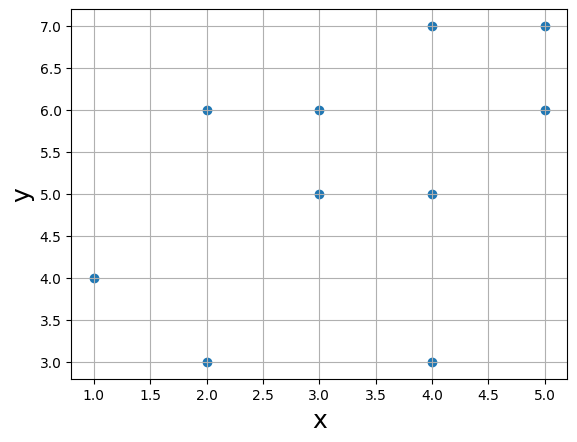

In [4]:
# 散布図でデータを表示する
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 2, 3, 3, 4, 4, 4, 5, 5])
y = np.array([4, 6, 3, 5, 6, 7, 3, 5, 6, 7])

plt.scatter(x, y)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)

## 2. 代表値の計算
次に，変量$x$と$y$それぞれの代表値を計算してみましょう．<br>
計算する代表値と定義の表は以下です．<br>

 代表値   |&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;計算式&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
--------- |----------------------------------------
$x$の平均 | $\bar{x} = \frac{1}{n}\sum_{i=1}^n x_i$
$y$の平均 | $\bar{y} = \frac{1}{n}\sum_{i=1}^n y_i$
$x$の分散 | $S_{xx} = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})^2$
$y$の分散 | $S_{yy} = \frac{1}{n}\sum_{i=1}^n (y_i - \bar{y})^2$
$x,y$の共分散 | $S_{xy} = \frac{1}{n}\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})$



In [5]:
# 代表値の数値計算
n = len(x) # サンプルの数
mean_x = np.sum(x)/n# xの平均【追記が必要です】
mean_y = np.sum(y)/n# yの平均【追記が必要です】
var_x  = np.sum((x - mean_x)**2)/n# xの分散【追記が必要です】
var_y  = np.sum((y - mean_y)**2)/n# yの分散【追記が必要です】
cov_xy = np.sum((x - mean_x)*(y - mean_y))/n# x,yの共分散【追記が必要です】

print("xの平均=%.4f" % mean_x)
print("yの平均=%.4f" % mean_y)
print("xの分散=%.4f" % var_x)
print("yの分散=%.4f" % var_y)
print("x,yの共分散=%.4f" % cov_xy)

xの平均=3.3000
yの平均=5.2000
xの分散=1.6100
yの分散=1.9600
x,yの共分散=0.8400


## 3. 線形回帰分析
いよいよ，線形回帰分析をやっていきます．<br>

仮定する線形モデルは以下です．<br>
$y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$，$\varepsilon_i \sim N(0, \sigma^2)$<br>
また，$\sigma=1$は既知とします．<br>

データから$\beta_0$, $\beta_1$を推定し，直線を描画してみましょう．<br>

計算式は以下です．<br>
切片：$\hat{\beta}_0 = \bar{y} - \frac{S_{xy}}{S_{xx}} \bar{x}$ <br>
傾き：$\hat{\beta}_1 = \frac{S_{xy}}{S_{xx}}$ <br>


 切片 = 3.4783 
 傾き = 0.5217 


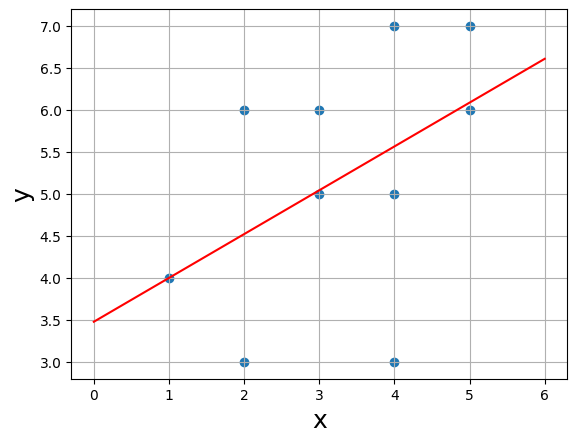

In [6]:
#@title 線形回帰と描画
%matplotlib inline

beta1 = cov_xy / var_x# 傾き【追記が必要です】
beta0 =mean_y - beta1*mean_x# 切片【追記が必要です】

print(" 切片 = %.4f " % beta0)
print(" 傾き = %.4f " % beta1)

plt.scatter(x, y)
plt.xlabel('x', fontsize=18)
plt.ylabel('y', fontsize=18)
plt.grid(True)

#直線の描画
x_lim = np.array([np.min(x)-1, np.max(x)+1])
y_lim = beta0 + beta1*x_lim
plt.plot(x_lim,y_lim, "red")
plt.show()

# 4. 仮説検定
最後に，推定した傾き$\hat{\beta}_1$が統計的に意味のあるものなのか，について仮説検定を用いて調べていきたいと思います．

まず，帰無仮説と対立仮説<br>
$H_0 : {\beta}_1 = 0$<br>
$H_1 : {\beta}_1 \neq 0$<br>
を考えます．<br>
$\sigma$を既知とすると，$H_0$が正しいならば$\hat{\beta}_1 \sim N(0,\frac{\sigma^2}{n S_{xx}})$に従うはずです．

まずは，正規分布$N(0,\frac{\sigma^2}{n S_{xx}})$と$\hat{\beta}_1$の値を描画してみましょう．

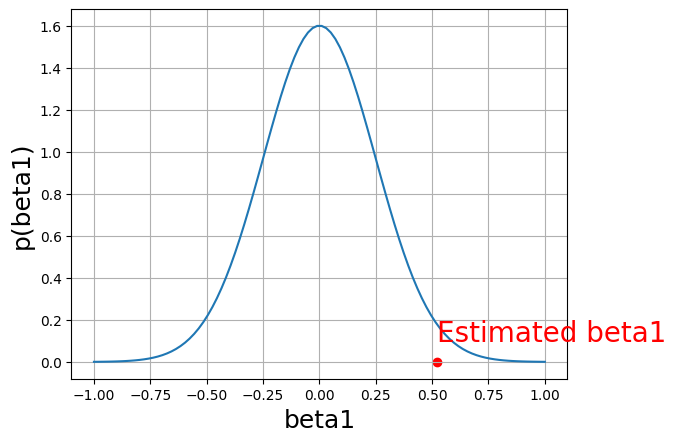

In [7]:
#@title 傾きの推定量が従う正規分布の描画
%matplotlib inline

sigma = 1.0 # sigmaは既知
var_beta1 = (sigma**2)/(n*var_x)# 傾きの推定量の分散【追記が必要です】

t  = np.linspace(-1.0, 1.0, 100)
pt = 1/np.sqrt(2*np.pi*var_beta1)*np.exp(-0.5/var_beta1*(t**2))

plt.plot(t, pt)
plt.xlabel('beta1', fontsize=18)
plt.ylabel('p(beta1)', fontsize=18)
plt.grid(True)

plt.scatter(beta1, 0, color="red")
plt.text(beta1, 0.1, "Estimated beta1", size=20, color="red")

plt.show()

描画しただけでは定量的な評価になりません．<br>
実際に$-|\hat{\beta}_1|$，$|\hat{\beta}_1|$を境界にして正規分布の両端の面積を計算していきましょう．

In [10]:
from scipy.stats import norm

z_value = (beta1 -0)/np.sqrt(var_beta1)# beta1の値を正規化【追記が必要です】
p_value = 2*norm.cdf(-np.abs(z_value))# p値を計算【追記が必要です】

print("z値は" + str(z_value))
print("p値は" + str(p_value))

z値は2.0934681023727526
p値は0.036307388610389894


## 提出課題
以下に示す図のPC画面と手書きした紙の写真を撮り，PDFにまとめてmoodleで提出してください．
1. 線形回帰後の散布図（PC画面）
2. $\hat{\beta}_1$が従う正規分布の図（PC画面）
3. z値またはp値を用いた有意水準5%と1%の検定結果（手書きした紙）

本演習はここまでです！お疲れさまでした！